## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import tensorflow as tf
from keras import layers
from keras import initializers
import os

## Prepare Dataframes

### Renan data frame

In [2]:
renan = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "../letters_csv_writer/letters/Renan"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Renan"

          renan = pd.concat([renan,df])
          
renan = renan.reset_index(drop=True)  

### Guilherme dataframe

In [3]:
guilherme = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "../letters_csv_writer/letters/Guilherme"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Guilherme"

          guilherme = pd.concat([guilherme,df])
          
guilherme = guilherme.reset_index(drop=True) 

### dataframe Claudinei

In [4]:
claudinei = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "../letters_csv_writer/letters/Claudinei"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Claudinei"

          claudinei = pd.concat([claudinei,df])
          
claudinei = claudinei.reset_index(drop=True)

### agroup dataframe's

In [5]:
groupDataframe = pd.concat([renan,guilherme, claudinei])
groupDataframe = groupDataframe.reset_index(drop=True)
groupDataframe

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,Target letter,Target person
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
2,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,U,Claudinei
3638,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,U,Claudinei
3639,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,U,Claudinei
3640,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,U,Claudinei


# 2 - Training

#### separate input "X" and output "Y" data

In [6]:
X = groupDataframe.iloc[:,0:180]
X

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3638,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3639,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3640,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y = groupDataframe.iloc[:,180]
Y

0       A
1       A
2       A
3       A
4       A
       ..
3637    U
3638    U
3639    U
3640    U
3641    U
Name: Target letter, Length: 3642, dtype: object

In [8]:
Y.to_csv("groupletter.csv")

### Neural Network model in keras TF

In [56]:
SAMPLES = Y.__len__()  

x_values = X.to_numpy()

Y = Y.replace("A", 0)
Y = Y.replace("E", 1)
Y = Y.replace("I", 2)
Y = Y.replace("O", 3)
Y = Y.replace("U", 4)
 
y_values = Y.to_numpy()

# divide dados em treinamento, validação e teste
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
# cria uma rede neural de 2 camadas de 16 neurônicos cada
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(180,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(5)) #, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, epochs=200, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/200


125/137 [==========================>...] - ETA: 0s - loss: 1.5514 - mae: 1.0040WARNING:tensorflow:Model was constructed with shape (None, None, 180) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 180), dtype=tf.float32, name='dense_15_input'), name='dense_15_input', description="created by layer 'dense_15_input'"), but it was called on an input with incompatible shape (None, 180).


137/137 [==============================] - 2s 5ms/step - loss: 1.4629 - mae: 0.9677 - val_loss: 3.1734 - val_mae: 1.4243
Epoch 2/200
137/137 [==============================] - 0s 3ms/step - loss: 0.4180 - mae: 0.5063 - val_loss: 2.6906 - val_mae: 1.2652
Epoch 3/200
137/137 [==============================] - 0s 3ms/step - loss: 0.2573 - mae: 0.3754 - val_loss: 2.2001 - val_mae: 1.1597
Epoch 4/200
137/137 [==============================] - 0s 3ms/step - loss: 0.1747 - mae: 0.2929 - val_loss: 1.9530 - val_mae: 1.0891
Epoch 5/200
137/137 [==============================] - 0s 3ms/step - loss: 0.1329 - mae: 0.2456 - val_loss: 1.8509 - val_mae: 1.0604
Epoch 6/200
137/137 [==============================] - 0s 3ms/step - loss: 0.1045 - mae: 0.2187 - val_loss: 1.5850 - val_mae: 0.9646
Epoch 7/200
137/137 [==============================] - 0s 3ms/step - loss: 0.0892 - mae: 0.1976 - val_loss: 1.7014 - val_mae: 1.0033
Epoch 8/200
137/137 [==============================] - 0s 3ms/step - loss: 0.0770

### Training

In [57]:
def test_model(model, verbose=False):
    y_test = random_state=1
    y_pred= model.predict(x_test)
    print('MAE', np.abs(y_pred - y_test).mean())

In [58]:
#import random
#seed = random.randrange(3847)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,6), random_state=1, max_iter=5000, activation='relu') #2 camadas ocultas com 2 neurônios
clf.fit(x_train, np.ravel(y_train))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 6), max_iter=5000,
              random_state=1, solver='lbfgs')

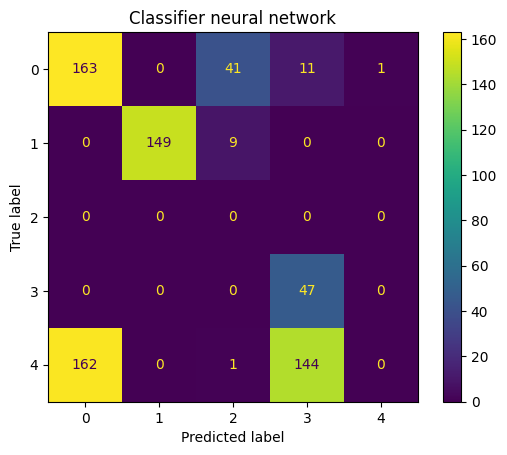

In [59]:
y_pred = clf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Classifier neural network')
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.75      0.51       216
           1       0.95      0.94      0.94       240
           2       0.59      0.93      0.72       222
           3       0.35      0.57      0.43       260
           4       0.00      0.00      0.00       519

    accuracy                           0.51      1457
   macro avg       0.46      0.64      0.52      1457
weighted avg       0.37      0.51      0.42      1457



# Export Model 
#### Converter model to "tflite"

In [36]:
test_model(model, verbose=True)
converter = tf.lite.TFLiteConverter.from_keras_model(model) 
tflite_model = converter.convert() 
# Save the model to disk 
open("morse_model.tflite", "wb").write(tflite_model)

46/46 [==============================] - 0s 2ms/step
MAE 1.3803707
INFO:tensorflow:Assets written to: C:\Users\CLAUDI~1\AppData\Local\Temp\tmpkyej8jnu\assets


INFO:tensorflow:Assets written to: C:\Users\CLAUDI~1\AppData\Local\Temp\tmpkyej8jnu\assets


20460

### convert model to an array in 'C'

In [16]:
!xxd -i sine_model.tflite > morse_model.cc